# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [ ]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

In [ ]:
# Your code to create a clustering solution

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.labels_

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0], dtype=int32)

In [15]:
import pandas as pd
import altair as alt
X_df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
X_df['label'] = pd.Series(kmeans.labels_)


In [45]:
def createClusteringChart(df):

    legend_list =  [f"Cluster {i}" for i in X_df['label'].unique().tolist()]
    df['legend'] = pd.Series(legend_list)

    chart = alt.Chart(
            X_df, title="Clusterings for random data"
    ).mark_circle(
    
    ).encode(
        x=alt.X("Feature1:Q", title="Feature 1"),
        y=alt.Y("Feature2:Q", title="Feature 2"),
        color = alt.Color("legend:N", )  
    )
    return chart




In [46]:
createClusteringChart(X_df)

alt.Chart(...)

In [47]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

X_df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
X_df['label'] = pd.Series(cls_assignment)

In [48]:
createClusteringChart(X_df)

alt.Chart(...)

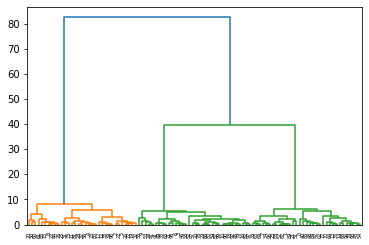

In [30]:
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib.pyplot as plt
plt.figure()
dendrogram(ward(X))
plt.show()

In [49]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}", format(cls))

X_df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
X_df['label'] = pd.Series(cls)
createClusteringChart(X_df)


Cluster membership values:
{} [ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


alt.Chart(...)

In [38]:
import altair as alt
import pandas as pd
df = pd.DataFrame({'Year': [2014, 2015, 2016, 2017, 2018, 2019],
 'Total': [376, 1198, 1871, 4386, 4920, 2417],
 'Missing': [299, 758, 1063, 233, 32, 11],
 'Difference': [77, 440, 808, 4153, 4888, 2406]}
)


melted = pd.melt(df.drop('Total', axis=1).rename({'Difference': 'Total'}, axis=1),
                 id_vars=['Year'], value_vars=['Total', 'Missing'])

alt.Chart(melted).mark_bar().encode(
    alt.X('Year:O', title=''),
    alt.Y('value:Q', title=''),
    alt.Color('variable:N', 
              scale=alt.Scale(domain=['Total', 'Missing'],
                              range=['#ddccbb', 'red'])),
    order=alt.Order('variable', sort='ascending')
).properties(    
    background='white'          
)

alt.Chart(...)

In [39]:
melted

,Year,variable,value
0,2014,Total,77
1,2015,Total,440
2,2016,Total,808
3,2017,Total,4153
4,2018,Total,4888
5,2019,Total,2406
6,2014,Missing,299
7,2015,Missing,758
8,2016,Missing,1063
9,2017,Missing,233
